# Aerolínea: Mejor lugar para vivir

Una aerolínea tiene las siguientes rutas desde las ciudades a las que sirve (cada par tiene servicio en ambas direcciones).

(Similar al Ejercicio 2.3 de los Ejercicios 1.1)

In [2]:
routemap =  [('St. Louis', 'Miami'), 
             ('St. Louis', 'San Diego'), 
             ('St. Louis', 'Chicago'), 
             ('San Diego', 'Chicago'), 
             ('San Diego', 'San Francisco'), 
             ('San Diego', 'Minneapolis'), 
             ('San Diego', 'Boston'), 
             ('San Diego', 'Portland'), 
             ('San Diego', 'Seattle'), 
             ('Tulsa', 'New York'), 
             ('Tulsa', 'Dallas'), 
             ('Phoenix', 'Cleveland'), 
             ('Phoenix', 'Denver'), 
             ('Phoenix', 'Dallas'), 
             ('Chicago', 'New York'), 
             ('Chicago', 'Los Angeles'), 
             ('Miami', 'New York'), 
             ('Miami', 'Philadelphia'), 
             ('Miami', 'Denver'), 
             ('Boston', 'Atlanta'), 
             ('Dallas', 'Cleveland'), 
             ('Dallas', 'Albuquerque'), 
             ('Philadelphia', 'Atlanta'), 
             ('Denver', 'Minneapolis'), 
             ('Denver', 'Cleveland'), 
             ('Albuquerque', 'Atlanta'), 
             ('Minneapolis', 'Portland'), 
             ('Los Angeles', 'Seattle'), 
             ('San Francisco', 'Portland'), 
             ('San Francisco', 'Seattle'), 
             ('San Francisco', 'Cleveland'), 
             ('Seattle', 'Portland')]

+ Calcule la distancia entre cada par de ciudades, añada esa distancia como pesos de la red.

Imprima la nueva red con pesos

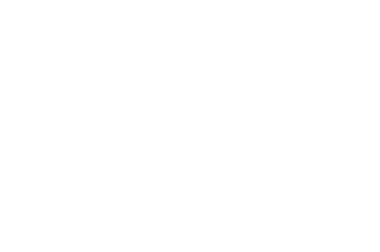

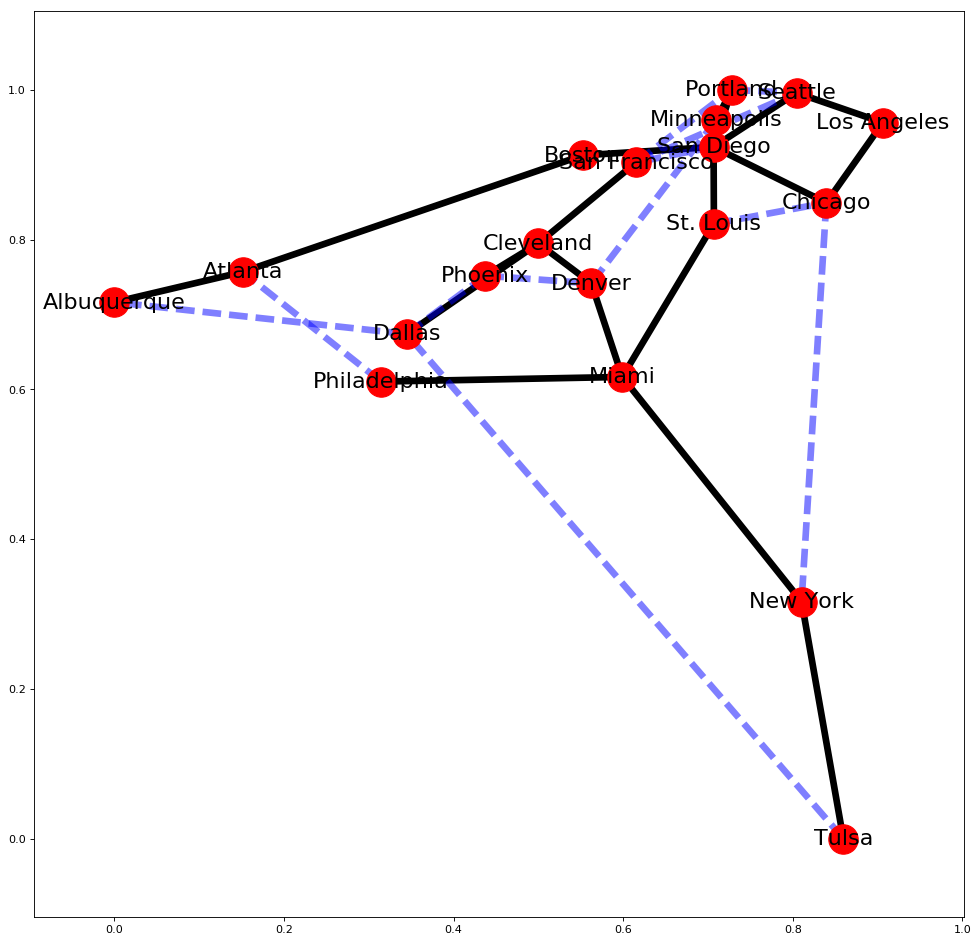

In [5]:
import numpy as np
import operator
import networkx as nx
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer

%matplotlib inline

routemap_with_weights =  [('St. Louis', 'Miami', 1712), 
             ('St. Louis', 'San Diego', 2515), 
             ('St. Louis', 'Chicago', 423), 
             ('San Diego', 'Chicago', 2790), 
             ('San Diego', 'San Francisco', 738), 
             ('San Diego', 'Minneapolis', 2466), 
             ('San Diego', 'Boston', 4155), 
             ('San Diego', 'Portland', 1502), 
             ('San Diego', 'Seattle', 1714), 
             ('Tulsa', 'New York', 1977), 
             ('Tulsa', 'Dallas', 383), 
             ('Phoenix', 'Cleveland', 2813), 
             ('Phoenix', 'Denver', 943), 
             ('Phoenix', 'Dallas', 1425), 
             ('Chicago', 'New York', 1146), 
             ('Chicago', 'Los Angeles', 2807), 
             ('Miami', 'New York', 1760), 
             ('Miami', 'Philadelphia', 1647), 
             ('Miami', 'Denver', 2780), 
             ('Boston', 'Atlanta', 1508), 
             ('Dallas', 'Cleveland', 1651), 
             ('Dallas', 'Albuquerque', 941), 
             ('Philadelphia', 'Atlanta', 1072), 
             ('Denver', 'Minneapolis', 1125), 
             ('Denver', 'Cleveland', 1972), 
             ('Albuquerque', 'Atlanta', 2041), 
             ('Minneapolis', 'Portland', 2293), 
             ('Los Angeles', 'Seattle', 1547), 
             ('San Francisco', 'Portland', 863), 
             ('San Francisco', 'Seattle', 1094), 
             ('San Francisco', 'Cleveland', 3483), 
             ('Seattle', 'Portland', 233)]

G = nx.Graph()

G.add_weighted_edges_from(routemap_with_weights)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1500]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1500]

pos=nx.spectral_layout(G) # positions for all nodes

plt.axis('off')
plt.figure(num=None,figsize=(15,15),dpi=80)
# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif') 
plt.show() # display

+ Cuál es el máximo número de intercambios que tendría que hacer un pasajero en un solo viaje entre dos ciudades servidas? (suponiendo rutas óptimas)

In [8]:
def edges_to_graph(edges):
    edges = list(edges)
    graph = {}
    
    for i in range(0,len(edges)):
        
        if graph.get(edges[i][0], None):
            graph[edges[i][0]].add(edges[i][1])
        else:
            if len(edges[i]) == 2:
                graph[edges[i][0]] = set([edges[i][1]])
            else:
                graph[edges[i][0]] = set([])
        
        if len(edges[i]) == 2:
            if graph.get(edges[i][1], None):
                graph[edges[i][1]].add(edges[i][0])
            else:
                graph[edges[i][1]] = set([edges[i][0]])

    return graph


""" This function was taken from Python Software Foundation.
    Python Patterns - Implementing Graphs. https://www.python.org/doc/essays/graphs/ 
    (Visited in march 2017) """
def find_shortest_path(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return path
    if not start in graph:
        return None
    shortest = None
    for next in graph[start]:
        if next not in path:
            newpath = find_shortest_path(graph, next, end, path)
            if newpath:
                if not shortest or len(newpath) < len(shortest):
                    shortest = newpath
    return shortest

graph1 = edges_to_graph(routemap)

def distance_matrix(graph):
    keys = list(graph.keys())
    keys.sort()
    
    d_matrix = np.zeros((len(keys),len(keys)))
    
    for i in range(0, len(keys)):
        for j in range(0, len(keys)):
            start = keys[i]
            end = keys[j]
            path = find_shortest_path(graph, start, end)
            d_matrix[i][j] = len(path)-1
    
    return (d_matrix, keys)


def max_distance(graph):
    result = distance_matrix(graph)
    keys = result[1]
    d_matrix = result[0]
    
    result = 0
    result_i = -1
    result_j = -1
    for i in range(0, len(keys)):
        for j in range(0, len(keys)):
            if d_matrix[i][j] >= result:
                result = d_matrix[i][j]
                result_i = i
                result_j = j
    
    start = keys[result_i]
    end = keys[result_j]
    
    return (start, end, result)


print (max_distance(graph1))

print("El máximo número de intercambios suponiendo rutas óptimas se da entre" +\
       " Los Angeles y Albuquerque con un mínimo número de intercambios de 5 y " +\
       "siguiendo el camino %s" % (find_shortest_path(graph1,'Los Angeles','Albuquerque')))


('Los Angeles', 'Albuquerque', 5.0)
El máximo número de intercambios suponiendo rutas óptimas se da entre Los Angeles y Albuquerque con un mínimo número de intercambios de 5 y siguiendo el camino ['Los Angeles', 'Chicago', 'New York', 'Tulsa', 'Dallas', 'Albuquerque']


+ Si usted necesitara viajar mucho en esta aerolínea, cual sería el lugar óptimo para vivir? (i.e. minimizar el tiempo de viaje para llegar a cualquier ciudad. Asuma que el tiempo entre intercambios es de 1 hora y que los aviones viajan a 500 km/hora)

In [9]:
import statistics as s
# This code snippet was based on the code by Lynn Root
# https://gist.github.com/econchick/4666413
    
def dijsktra(graph, initial):
    visited = {initial: 0}
    path = {}
    nodes = set(graph.nodes())

    while nodes: 
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node

        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in graph[min_node]:
            # Adición de tiempo de espera y conversión de velocidad
            weight = current_weight + 1 + graph[min_node][edge]['weight']/500
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path

G = nx.Graph()
G.add_weighted_edges_from(routemap_with_weights)

avgs = [0.0] * len(G.nodes())

for idx,node in enumerate(G.nodes()):
    visited, __ = dijsktra(G, node)
    avgs[idx] = s.mean(list(visited.values()))

min_avgs = min(avgs)
optimum_place = G.nodes()[avgs.index(min(avgs))]
    
print("El lugar óptimo para vivir sería %s con un mínimo tiempo promedio de espera de %f horas" % (optimum_place, min_avgs))

El lugar óptimo para vivir sería Dallas con un mínimo tiempo promedio de espera de 9.183789 horas


+ Calcule diferentes medidas de centralidad. Es el nodo que escogió para vivir el más importante según estas medidas? Explique

No. De acuerdo a las medidas de centralidad elegidas (5 de 6 medidas de centralidad elegidas) el lugar óptimo para vivir es San Diego y no Dallas. Esto se puede deber a que San Diego es un hub por el cual muchos nodos tienen que pasar (closeness centrality) y a su vez San Diego sirve como puente para el paso de varios nodos en sus rutas (Betweenness centrality)

In [12]:
# Different centrality measures:

# Eigenvector centrality

def get_hubs(graph, number_of_hubs, message, centrality_function):
    
    centrality_measure = centrality_function(G)
    sorted_hubs = sorted(centrality_measure.items(), key=operator.itemgetter(1), reverse=True)
    hubs = [sorted_hub[0] for sorted_hub in sorted_hubs]
    degrees = graph.degree()
    
    print(message)
    print(" ")
    for idx, hub in enumerate(hubs):
        print("Rank: %s" %(idx + 1))
        print("Id: %s" %(hub))
        print("degree: %d " % (degrees[hub]))
        print("Centrality measure: %.10f" %(centrality_measure[hub]))
        print(" ")
        if number_of_hubs < len(hubs) and idx == number_of_hubs - 1:
            break

# Degree centrality
get_hubs(G, 5, "Degree centrality:", nx.degree_centrality)
    
# Eigenvector centrality
get_hubs(G, 5, "Eigenvector Centrality:", nx.eigenvector_centrality)

# Katz centrality
get_hubs(G, 5, "Katz Centrality:", nx.katz_centrality_numpy)

# Pagerank
get_hubs(G, 5, "Page Rank:", nx.pagerank)

# Closeness centrality
get_hubs(G, 5, "Closeness centrality:", nx.closeness_centrality)

# Betweenness centrality
get_hubs(G, 5, "Betweenness centrality:", nx.betweenness_centrality)



Degree centrality:
 
Rank: 1
Id: San Diego
degree: 7 
Centrality measure: 0.3888888889
 
Rank: 2
Id: Miami
degree: 4 
Centrality measure: 0.2222222222
 
Rank: 3
Id: Chicago
degree: 4 
Centrality measure: 0.2222222222
 
Rank: 4
Id: San Francisco
degree: 4 
Centrality measure: 0.2222222222
 
Rank: 5
Id: Portland
degree: 4 
Centrality measure: 0.2222222222
 
Eigenvector Centrality:
 
Rank: 1
Id: San Diego
degree: 7 
Centrality measure: 0.5981358791
 
Rank: 2
Id: Boston
degree: 2 
Centrality measure: 0.3467648263
 
Rank: 3
Id: Chicago
degree: 4 
Centrality measure: 0.3073104513
 
Rank: 4
Id: Minneapolis
degree: 3 
Centrality measure: 0.2920260167
 
Rank: 5
Id: St. Louis
degree: 3 
Centrality measure: 0.2501141441
 
Katz Centrality:
 
Rank: 1
Id: Albuquerque
degree: 2 
Centrality measure: 0.5883924716
 
Rank: 2
Id: St. Louis
degree: 3 
Centrality measure: 0.3627016904
 
Rank: 3
Id: San Francisco
degree: 4 
Centrality measure: 0.2916000823
 
Rank: 4
Id: Chicago
degree: 4 
Centrality measure:

# Modelos Generativos

__Simulación de Red de Citaciones__ (Similar al Ejercicio 1.2.1 de los Ejercicios 1.4)

Con un número de papers _N = 1000_. Los papers van a ser publicados en orden (primero 1, después 2, etc.) Defina el promedio de citaciones de cada paper (e.g. 3 citaciones). Cree un grupo inicial de papers. Cada nuevo paper tendrá ___c___ citaciones. Esas citaciones van a ser a papers ya existentes y proporcional al número de papers que citan a cada paper. 

+ Cree una red con estas propiedades

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


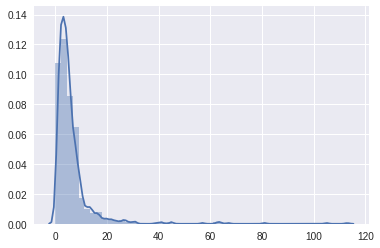

In [6]:
import seaborn as sns

%matplotlib inline


def citations_network(N, initial_papers=4):
    G=nx.DiGraph()

    for i in range(0, initial_papers):
        G.add_node(i)

    for nuevo_nodo in range(initial_papers,N):
        degree = G.degree()
        nodes = G.nodes()
        edges = G.edges()
        num_edges = len(G.edges())
        if num_edges == 0:
            for _ in range(np.random.poisson(3)):
                ran = np.random.randint(len(nodes))
                for j, n in enumerate(nodes):
                    if j == ran:
                        G.add_edge(nuevo_nodo,j)
        else:
            grado_total = sum(degree.values())
            for _ in range(np.random.poisson(3)):
                ran = np.random.randint(grado_total)
                n = None
                for n, d in degree.items():
                    ran -= d
                    if ran < 0:
                        break
                G.add_edge(nuevo_nodo, n)
            
    return G

def random_network(N, p):
    
    edges = []
    adj_matrix = np.zeros((N,N), dtype=int)
    
    for i in range(0, N-1):
        for j in range(i+1, N):
            rand = random.random()
            if rand <= p:
                edges.append((i+1,j+1))
                adj_matrix[i][j] = 1
                adj_matrix[j][i] = 1
    
    for i in range(0, N):
        if sum(adj_matrix[i]) == 0:
            edges.append((i+1,))
            
    G = nx.Graph()
    G.add_edges_from(G)
    return G

N = 1000

G = citations_network(1000, 5)

p = 2*len(G.edges())/(N*(N-1))
G_ran = nx.gnp_random_graph(1000,p)

bx = sns.distplot(list(G.degree().values()))


+ Compare la distribución de grados de esta red con una red aleatoria con el mismo número de nodos y enlaces

/home/sangeea/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


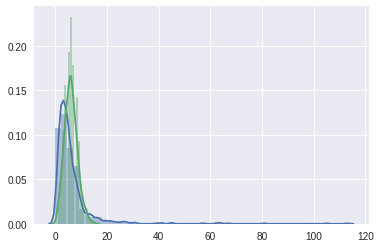

In [7]:
G_ran = nx.gnp_random_graph(1000,p)

bx = sns.distplot(list(G.degree().values()))
ax = sns.distplot(list(G_ran.degree().values()))

+ Calcule 5 diferentes medidas de centralidad para esta red (incluyendo degree centrality, i.e. descubra los Hubs)

In [8]:
import operator


def get_hubs(graph, number_of_hubs, message, centrality_function):
    
    centrality_measure = centrality_function(G)
    sorted_hubs = sorted(centrality_measure.items(), key=operator.itemgetter(1), reverse=True)
    hubs = [sorted_hub[0] for sorted_hub in sorted_hubs]
    in_degrees = graph.in_degree()
    out_degrees = graph.out_degree()
    
    print(message)
    print(" ")
    for idx, hub in enumerate(hubs):
        print("Rank: %s" %(idx + 1))
        print("Id: %s" %(hub))
        print("In degree: %d " % (in_degrees[hub]))
        print("Out degree: %d" % (out_degrees[hub]))
        print("Centrality measure: %.10f" %(centrality_measure[hub]))
        print(" ")
        if number_of_hubs < len(hubs) and idx == number_of_hubs - 1:
            break

def get_hits(graph, number_of_hubs, number_of_authorities):
    
    centrality_measure = nx.hits(graph)
    print("Hubs and authorities:")
    sorted_hubs = sorted(centrality_measure[0].items(), key=operator.itemgetter(1), reverse=True)
    hubs = [sorted_hub[0] for sorted_hub in sorted_hubs]
    in_degrees = graph.in_degree()
    out_degrees = graph.out_degree()
    
    print("Hubs:")
    print(" ")
    for idx, hub in enumerate(hubs):
        print("Rank: %s" %(idx + 1))
        print("Id: %s" %(hub))
        print("In degree: %d " % (in_degrees[hub]))
        print("Out degree: %d" % (out_degrees[hub]))
        print("Centrality measure: %.10f" %(centrality_measure[0][hub]))
        print(" ")
        if number_of_hubs < len(hubs) and idx == number_of_hubs - 1:
            break
            
    sorted_authorities = sorted(centrality_measure[1].items(), key=operator.itemgetter(1), reverse=True)
    authorities = [sorted_authority[0] for sorted_authority in sorted_authorities]
    
    print("Authorities:")
    print(" ")
    for idx, authority in enumerate(authorities):
        print("Rank: %s" %(idx + 1))
        print("Id: %s" %(authority))
        print("In degree: %d " % (in_degrees[authority]))
        print("Out degree: %d" % (out_degrees[authority]))
        print("Centrality measure: %.10f" %(centrality_measure[1][authority]))
        print(" ")
        if number_of_authorities < len(authorities) and idx == number_of_authorities - 1:
            break
            
# Degree centrality
get_hubs(G, 5, "Degree centrality:", nx.degree_centrality)
    
# Eigenvector centrality
get_hubs(G, 5, "Eigenvector Centrality:", nx.eigenvector_centrality)

# Katz centrality
get_hubs(G, 5, "Katz Centrality:", nx.katz_centrality)

# Pagerank
get_hubs(G, 5, "Page Rank:", nx.pagerank)

# Hubs and authorities (HITS)
get_hits(G, 5, 5)

# Closeness centrality
get_hubs(G, 5, "Closeness centrality:", nx.closeness_centrality)

# Betweenness centrality
get_hubs(G, 5, "Betweenness centrality:", nx.betweenness_centrality)

    

Degree centrality:
 
Rank: 1
Id: 13
In degree: 106 
Out degree: 7
Centrality measure: 0.1177083333
 
Rank: 2
Id: 6
In degree: 103 
Out degree: 2
Centrality measure: 0.1093750000
 
Rank: 3
Id: 0
In degree: 81 
Out degree: 0
Centrality measure: 0.0843750000
 
Rank: 4
Id: 8
In degree: 64 
Out degree: 3
Centrality measure: 0.0697916667
 
Rank: 5
Id: 5
In degree: 63 
Out degree: 1
Centrality measure: 0.0666666667
 
Eigenvector Centrality:
 
Rank: 1
Id: 0
In degree: 81 
Out degree: 0
Centrality measure: 0.0000000000
 
Rank: 2
Id: 1
In degree: 0 
Out degree: 0
Centrality measure: 0.0000000000
 
Rank: 3
Id: 2
In degree: 0 
Out degree: 0
Centrality measure: 0.0000000000
 
Rank: 4
Id: 3
In degree: 0 
Out degree: 0
Centrality measure: 0.0000000000
 
Rank: 5
Id: 4
In degree: 0 
Out degree: 0
Centrality measure: 0.0000000000
 
Katz Centrality:
 
Rank: 1
Id: 0
In degree: 81 
Out degree: 0
Centrality measure: 0.3525157850
 
Rank: 2
Id: 6
In degree: 103 
Out degree: 2
Centrality measure: 0.3290506047


+ Cree 10 nuevas redes con este proceso y compare cuáles son los nodos que se vuelven Hubs y tienen altos niveles de centralidad
    + Son siempre los mismos nodos los que se vuelven hubs y tienen alta centralidad?
    + Cómo estas obsrevaciones tiene relación con la vida real?

In [9]:
def get_hubs_list(graph, number_of_hubs, centrality_function):
    centrality_measure = centrality_function(G)
    sorted_hubs = sorted(centrality_measure.items(), key=operator.itemgetter(1), reverse=True)
    hubs = [sorted_hub[0] for sorted_hub in sorted_hubs]
    return hubs[0:number_of_hubs]


for i in range(10):
    G = citations_network(1000)
    print("hubs list degree centrality: %s" %(str(get_hubs_list(G, 5, nx.degree_centrality))))
    print("hubs list eigenvector centrality: %s" %(str(get_hubs_list(G, 5, nx.eigenvector_centrality))))
    print("hubs list katz centrality: %s" %(str(get_hubs_list(G, 5, nx.katz_centrality_numpy))))
    print("hubs list pagerank: %s" %(str(get_hubs_list(G, 5, nx.pagerank))))
    print("hubs list closeness centrality: %s" %(str(get_hubs_list(G, 5, nx.closeness_centrality))))
    print("hubs list betweenness centrality: %s" %(str(get_hubs_list(G, 5, nx.betweenness_centrality))))
    print(" ")

hubs list degree centrality: [2, 4, 7, 11, 3]
hubs list eigenvector centrality: [0, 1, 2, 3, 4]
hubs list katz centrality: [2, 3, 4, 7, 11]
hubs list pagerank: [2, 3, 4, 7, 1]
hubs list closeness centrality: [988, 964, 748, 689, 966]
hubs list betweenness centrality: [141, 129, 222, 119, 39]
 
hubs list degree centrality: [11, 1, 26, 23, 6]
hubs list eigenvector centrality: [0, 1, 2, 3, 4]
hubs list katz centrality: [1, 11, 6, 4, 26]
hubs list pagerank: [1, 4, 6, 5, 11]
hubs list closeness centrality: [827, 979, 745, 968, 927]
hubs list betweenness centrality: [23, 26, 270, 39, 197]
 
hubs list degree centrality: [6, 19, 39, 32, 4]
hubs list eigenvector centrality: [0, 1, 2, 3, 4]
hubs list katz centrality: [6, 0, 4, 3, 1]
hubs list pagerank: [0, 4, 1, 3, 6]
hubs list closeness centrality: [863, 797, 781, 978, 808]
hubs list betweenness centrality: [39, 32, 82, 44, 57]
 
hubs list degree centrality: [4, 12, 2, 71, 17]
hubs list eigenvector centrality: [0, 1, 2, 3, 4]
hubs list katz cen

+ Son siempre los mismos nodos los que se vuelven hubs y tienen alta centralidad?

Generalmente siempre los nodos que ocupan las mayores posiciones de centralidad son los primeros. No necesariamente siempre será hub principal el mismo nodo. No obstante, los nodos que están en las primeras posiciones siguen siempre el patrón de volverse hubs. Por ejemplo y para el caso del degree centrality, se puede evidenciar cómo el nodo 4 se volvió hub en 7 de las 10 observaciones. Lo que indica que quien publica primero tiene más posibilidades de ser citado y será más citado en la medida en que tenga un mayor número de citas.

Para el caso del betweenness centrality, no siempre son los mismos nodos los que se vuelven hubs, no obstante, siempre están en el mismo rango de [70,270] aproximadamente. lo mismo ocurre para el closeness centrality.

Todo lo anterior indica, que si bien un nodo específico puede que no sea hub al repetir un experimento, sí los nodos de un rango determinado van a ocupar la posición superior en cada medida de centralidad.

Para el eigenvector centrality siempre fueron los primeros 4 nodos los que fueron hubs al repetir el experimento 10 veces. Esto puede indicar que siempre el primer nodo en la red de citaciones es el que más puntaje tiene bajo esta medida de centralidad, segundo el segundo nodo que apareció y así sucesivamente.

+ Cómo estas obsrevaciones tiene relación con la vida real?

Estas observaciones siguen un patrón de la vida real donde los artículos que más citaciones tienen, serán nuevamente más citados y se ubicarán en la parte de la gráfica en forma de campana, mientras que la gran mayoría de artículos se ubicarán en la cola de la red.

Si bien la red de citaciones con una media de 3 sigue la forma de una red libre de escala, su estructura se asemeja a la de una red aleatoria con algo de skewness hacia la izquierda. Esto sugeriría que una caída en los nodos de primeras citaciones no generaría una repercusión tan grande en los demás nodos, como sí lo haría una red libre de escala con una media menor.

#### Relación con la vida real

Esta simulación de red de citaciones se cumple parcialmente, no obstante acá se está teniendo en cuenta el mero factor de distribución. No necesariamente los nodos que aparecen primero en una red serán los más citados, como lo muestra la extracción de componentes conectados, donde el artículo número 3 nunca fue citado, no obstante estos primeros nodos sí tienen mayor probabilidad de ser citados.

+ Cuantos componentes tiene la red? (Explique por qué)

In [14]:
components = sorted(nx.weakly_connected_components(G), key = len, reverse=True)
print(components)
print(len(components))

[{0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 

La red estudiada tiene dos componentes: 1 con 999 nodos conectados y el otro con un solo componente (artículo inicial que nunca fue citado).

Los resultados de estas cifras son llamativos, ya que como ocurre en la vida real, para que un artículo de investigación sea tenido en cuenta por la comunidad científica este debe tener citaciones. De este modo todos los artículos a partir del número 5 tienen citaciones de artículos previos, lo que habría de suponerse.

Esto soporta el planteamiento en la vida real de que una red de citaciones se comporta como una red libre de escala con un gama mayor a 2.